
<div style="text-align:center; font-size: 30px; font-weight: bold; font-family: 'Poppins', sans-serif;">
Series de Fourier
</div>
<div style="font-family: 'Poppins', sans-serif;">

<div style="margin: 10px; padding: 10px;"><img src="Fourier_series_sawtooth_wave.gif"><center><a herf="https://en.wikipedia.org/wiki/Fourier_series">La Serie de Fourier es una suma de n funciones sinusoidales de diferentes amplitudes y frecuencias relacionadas armónicamente. </a></center></div>

<div style="text-align:justify">
    
Las series de Fourier son series de términos coseno y seno y en la práctica representan funciones periódicas generales. Como aplicación constituyen una herramienta muy importante en la solución de problemas en los que intervienen ecuaciones diferenciales ordinarias y parciales. 

Las series de Fourier son, en cierto sentido, más universales que las series de Taylor, ya que muchas funciones periódicas discontinuas pueden desarrollarse en serie de Fourier, pero, desde luego, no tienen representaciones en serie de Taylor. 

La introducción de las series de Fourier fue uno de los mayores avances jamás realizados en la matemática y en sus aplicaciones en la ingeniería, ya que las series de Fourier son la herramienta más importante en la solución de problemas con valores en la frontera. 

<div class="pull-left" style="margin: 10px; padding: 10px;"><img src="Webp.net-resizeimage.jpg"><center><a herf="https://www.biografiasyvidas.com/biografia/f/fourier.htm">Jean-Baptiste Joseph Fourier</a></center></div>

Las Series de trigonométricas de Fourier, o simplemente series de Fourier fueron desarrolladas por el matemático francés Jean-Baptiste Joseph Fourier (21 de marzo de 1768 en Auxerre - 16 de mayo de 1830 en París). La idea que subyace en las series de Fourier es la descomposición de una señal periódica en términos de señales periódicas básicas (senos y cosenos) cuyas frecuencias son múltiplos de la señal original.
La idea de descomposición es un proceso fundamental en el área científica en general: la descomposición permite el análisis de las propiedades y la síntesis de los objetos o fenómenos.

Para aproximar una función con una serie de Fourier, se necesita:
1. Una función acotada periódica, con período T.
2. La función debe ser integrable durante el período.

La serie de Fourier de una función periódica (o señal) f(x) de período T, esta dada por:

\begin{equation}
f(t) = a_0 + \sum_{n=1}^\infty{a_n cos(w_n t) + b_n sen(w_n t)}
\end{equation}

donde:

\begin{equation}
w_n = \frac{2 \pi n}{T}
\end{equation}

\begin{equation}
a_0 = \int_0^T f(t)\mathrm{d}t
\end{equation}

\begin{equation}
a_n = \frac{2}{T}\int_\frac{T}{2}^\frac{-T}{2} f(t)cos(w_n t)\mathrm{d}t
\end{equation}

\begin{equation}
b_n = \frac{2}{T}\int_\frac{T}{2}^\frac{-T}{2} f(t)sen(w_n t)\mathrm{d}t
\end{equation}

</div>

</div>

In [367]:
#Librerias Necesarias para el procesamiento de datos y las graficas
import numpy as np
import matplotlib.pyplot as plt
#Librerias para generar GIF
import glob
import os
from PIL import Image
plt.style.use("ggplot")
#Periodo
T = 4
#Funcion Ola Cuadrada
def CurvaCuadrada(x):
    global T
    LimiteInferiorIzq = (-T/2)
    LimiteInferiorDer = 0
    LimiteSuperiorIzq  = 0
    LimiteSuperiorDer = (T/2)
    varUno = 1
    varUnoNegativo = -1
    while True:
        if (x >= LimiteInferiorIzq) and (x <= LimiteInferiorDer):
            return varUnoNegativo
        elif (x >= LimiteSuperiorIzq) and (x <= LimiteSuperiorDer):
            return varUno
        else:
            LimiteInferiorIzq -= T/2
            LimiteInferiorDer -= T/2
            LimiteSuperiorIzq += T/2
            LimiteSuperiorDer += T/2
            if varUno == 1:
                varUno = -1
                varUnoNegativo = 1
            else:
                varUno = 1
                varUnoNegativo = -1

# Funcion Coeficientes Bn 
def bn(n):
    n = int(n)
    if (n%2 != 0):
        return 4/(np.pi*n)
    else:
        return 0

# Funcion Coeficiente Wn
def wn(n):
    global T
    wn = (2*np.pi*n)/T
    return wn

# Funcion Series de Fourier (armonicos, valor_x)
def SerieFourier(n_max,x):
    a0 = 0
    suma_parcial = a0
    for n in range(1,n_max):
        try:
            suma_parcial = suma_parcial + bn(n)*np.sin(wn(n)*x)
        except:
            print("pasado")
            pass
    return suma_parcial

# Funcion Graficas
def grafica(x_,y,f,armonics,stringTipoWave):
    #Dimensiones de la Grafica
    plt.figure(figsize=(14,6))
    #Setear color fondo
    plt.rcParams['axes.facecolor'] = 'white'
    #Setear color, espesor, tipo de linea de grid
    plt.rcParams['grid.color'] = 'k'
    plt.rcParams['grid.linestyle'] = ':'
    plt.rcParams['grid.linewidth'] = 0.5
    #Grafica de la Funcion y la Aproximacion
    plt.plot(x_,y,color="#1C78B8",label="Señal f(t)")
    plt.plot(x_,f,color="#2B9D29",label="Aproximacion de Fourier")
    #Setear Titulo
    plt.title("Series de Fourier, con "+str(armonics)+" armónicos")
    #Setear Ubicacion de Leyenda
    plt.legend(loc=4)
    #Setear color, tipo de linea de ejes
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    #Guardar graficas
    nombre=str(armonics)+"_fourierArmonicos"+stringTipoWave+".png"
    plt.savefig(nombre, dpi=300)
    plt.show()
    
def setFourier(numArmonicos,stringTipoWave):
    valores_y = []
    valores_f = []
    for i in x_:
        valores_y.append(CurvaCuadrada(i))
        valores_f.append(SerieFourier(numArmonicos,i))
    grafica(x_,valores_y,valores_f,numArmonicos,stringTipoWave)
    
def setGIFFourier(stringTipoWave):
    fp_in = "*_fourierArmonicos"+stringTipoWave+".png"
    fp_out = "fourierGIF"+stringTipoWave+".gif"
    img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in), key=os.path.getmtime)]
    img.save(fp=fp_out, format='GIF', append_images=imgs,
             save_all=True, duration=1000, loop=0)

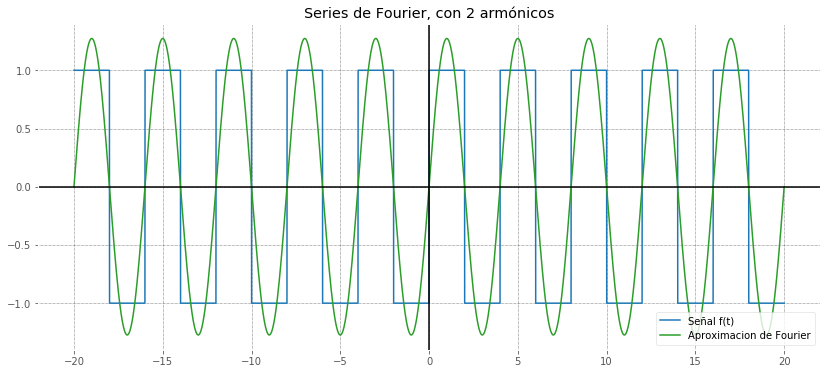

In [368]:
setFourier(2,"Square")


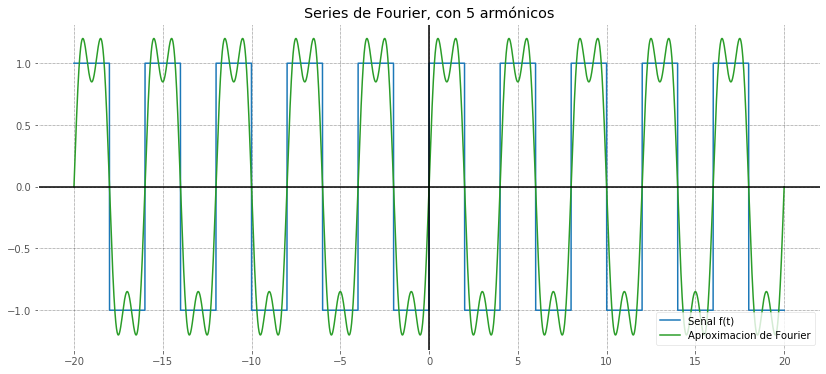

In [369]:
setFourier(5,"Square")

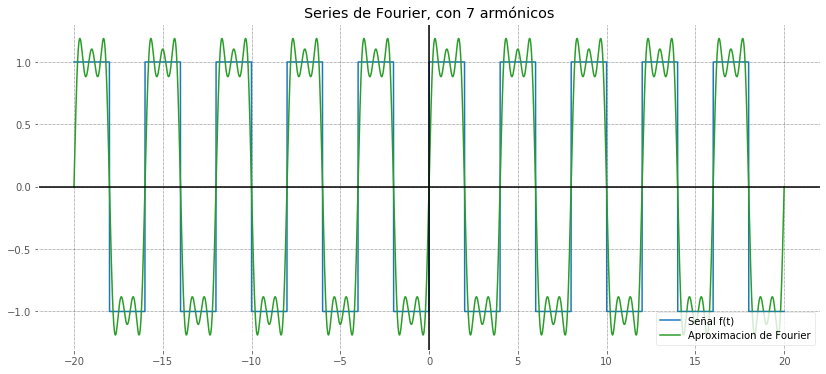

In [370]:
setFourier(7,"Square")

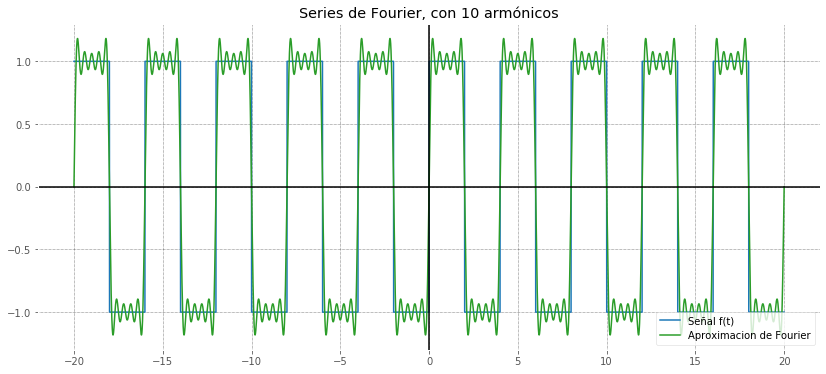

In [371]:
setFourier(10,"Square")

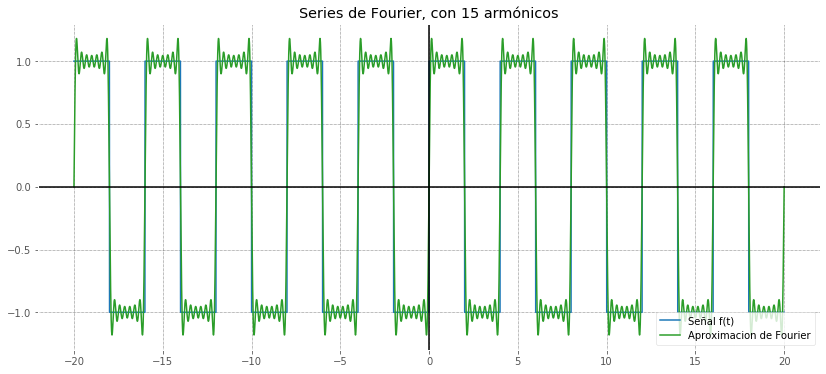

In [372]:
setFourier(15,"Square")

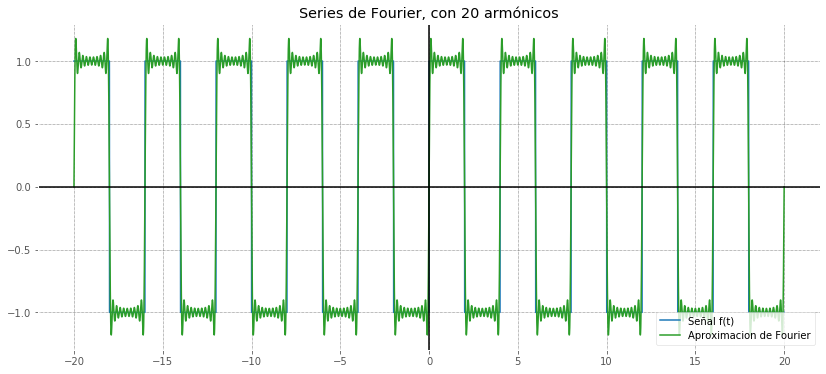

In [373]:
setFourier(20,"Square")

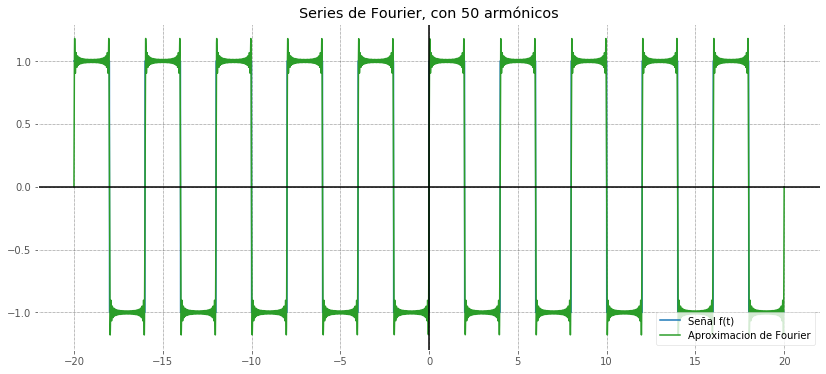

In [374]:
setFourier(50,"Square")

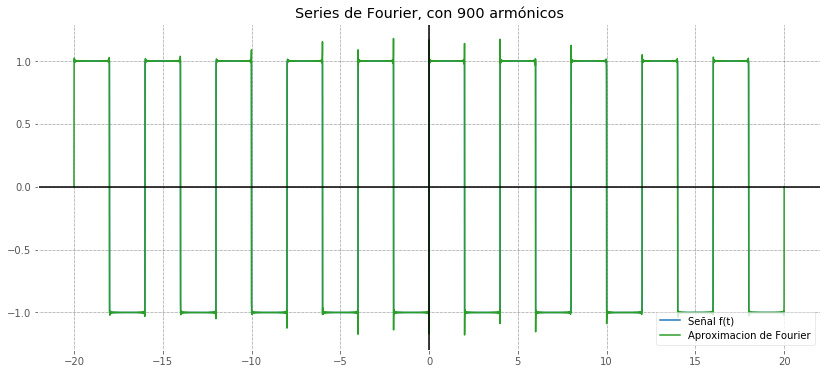

In [375]:
setFourier(900,"Square")

In [376]:
setGIFFourier("Square")

<div style="font-family: 'Poppins', sans-serif;">

<div style="margin: 10px; padding: 10px;"><img src="fourierGIFSquare.gif"><center><a herf="https://en.wikipedia.org/wiki/Fourier_series"> Ejemplo de la Serie de Fourier con una curva cuadrada, mediante el uso de 2, 5, 7, 10, 20, 50, 900 armónicos. Se evidencia su aproximación a mayor numero de armónicos. </a></center></div>
</div>

Fuente:
http://firsttimeprogrammer.blogspot.com/2015/04/fourier-series-and-square-wave.html